<a href="https://colab.research.google.com/github/Arfara/MachineLearningClass/blob/main/MidExam/UTS_ML_RandomForest_HealthcareDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UTS MACHINE LEARNING: RANDOM FOREST USING HEALTHCARE DATASET**
- Nama    : Arfara Yema Samgusdian
- NIM     : 1103202004
- Dataset : [Healthcare Dataset](https://www.kaggle.com/datasets/prasad22/healthcare-dataset)
- Model   : Random Forest Classification

## **APA ITU KLASIFIKASI MENGGUNAKAN RANDOM FOREST?**

Klasifikasi menggunakan Random Forest adalah salah satu metode dalam machine learning yang termasuk dalam kategori algoritma ensemble. Ensemble learning mengacu pada teknik-teknik yang menggabungkan beberapa model machine learning untuk meningkatkan kinerja dan keakuratan prediksi. Random Forest adalah salah satu jenis ensemble learning yang digunakan untuk tugas klasifikasi.

Keuntungan:
- Random Forest dapat menangani berbagai jenis data, termasuk data yang tidak seimbang (beberapa kelas memiliki jumlah contoh yang jauh lebih banyak atau lebih sedikit daripada kelas lainnya.).
- Memiliki kemampuan untuk menangani fitur-fitur yang tidak informatif atau kurang relevan.
- Dapat mengatasi masalah overfitting yang sering terjadi pada pohon keputusan tunggal.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Buat kode untuk melakukan
- EDA
- Visualisasi data
- Training data
- Evaluasi data

Menggunakan metode klasifikasi random forest, dengan dataset healthcare dan dataframe sebagai berikut

### Exploratory data analysis dan Visualisasi Data

EDA (Exploratory Data Analysis) adalah suatu pendekatan untuk menganalisis dataset dengan merangkum karakteristik utama, melihat hubungan antar variabel, dan menemukan pola-pola dalam data. Tujuan utama dari EDA adalah untuk memahami struktur dataset, mengeksplorasi variabilitas, dan mengidentifikasi potensi anomali atau tren yang dapat digali lebih lanjut.

Visualisasi data adalah suatu teknik dalam EDA yang melibatkan penggunaan grafik atau gambar untuk menyajikan informasi dari data. Melalui visualisasi, Anda dapat menggambarkan pola-pola, distribusi, dan hubungan antar variabel dengan cara yang lebih intuitif daripada hanya melihat angka-angka dalam dataset. Visualisasi data membantu peneliti dan analis untuk:

**Import Library yang dibutuhkan**

Pandas untuk manipulasi data, Matplotlib untuk plotting dasar, dan Seaborn untuk visualisasi data yang lebih kaya.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**
- Menggunakan Pandas untuk membaca dataset dari file CSV ('healthcare_dataset.csv').
- DataFrame (df) dibuat untuk menyimpan data.

In [ ]:
healtcare_dataset_path='/content/drive/MyDrive/Dataset/healthcare_dataset.csv'
df = pd.read_csv(healtcare_dataset_path)

**Display the First Few Rows of the Dataset**
- Menampilkan beberapa baris pertama dari dataset untuk mendapatkan gambaran awal.



In [ ]:
print(df.head())

                  Name  Age  Gender Blood Type Medical Condition  \
0      Tiffany Ramirez   81  Female         O-          Diabetes   
1          Ruben Burns   35    Male         O+            Asthma   
2            Chad Byrd   61    Male         B-           Obesity   
3    Antonio Frederick   49    Male         B-            Asthma   
4  Mrs. Brandy Flowers   51    Male         O-         Arthritis   

  Date of Admission          Doctor                   Hospital  \
0        2022-11-17  Patrick Parker           Wallace-Hamilton   
1        2023-06-01   Diane Jackson  Burke, Griffin and Cooper   
2        2019-01-09      Paul Baker                 Walton LLC   
3        2020-05-02  Brian Chandler                 Garcia Ltd   
4        2021-07-09  Dustin Griffin    Jones, Brown and Murray   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0           Medicare    37490.983364          146       Elective   
1   UnitedHealthcare    47304.064845          404      Eme

Output ini adalah beberapa baris pertama dari dataframe, menunjukkan data untuk beberapa kolom seperti Nama, Usia, Gender, Blood Type, dan sebagainya. Setiap baris mewakili satu catatan dalam dataset, dan setiap kolom mewakili atribut atau fitur yang terkait dengan catatan tersebut. Data ini bersifat hipotetis dan digunakan hanya untuk memberikan contoh.

**Summary Statistics**
- Menampilkan statistik deskriptif seperti rata-rata, median, kuartil, dll., untuk variabel numerik dalam dataset.

In [ ]:
print(df.describe())

                Age  Billing Amount   Room Number
count  10000.000000    10000.000000  10000.000000
mean      51.452200    25516.806778    300.082000
std       19.588974    14067.292709    115.806027
min       18.000000     1000.180837    101.000000
25%       35.000000    13506.523967    199.000000
50%       52.000000    25258.112566    299.000000
75%       68.000000    37733.913727    400.000000
max       85.000000    49995.902283    500.000000


- Count: Jumlah entri yang tidak hilang untuk setiap kolom.
- Mean: Rata-rata atau nilai tengah dari data.
- Std (Standard Deviation): Deviasi standar, mengukur sejauh mana nilai-nilai tersebar dari rata-rata.
- Min (Minimum): Nilai terkecil dalam kolom.
- 25% (Percentile 25th): Nilai yang membagi 25% data terendah.
- 50% (Percentile 50th): Median atau nilai tengah, membagi data menjadi dua bagian yang sama.
- 75% (Percentile 75th): Nilai yang membagi 75% data terendah.
- Max (Maximum): Nilai terbesar dalam kolom.

mendapatkan gambaran umum tentang distribusi data numerik dalam dataframe.


**Data Types and Missing Values**
- Menampilkan informasi tentang tipe data dan jumlah nilai yang tidak kosong (non-null) untuk setiap kolom.
- Berguna untuk mengidentifikasi jenis data dan mendeteksi nilai yang hilang

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

- RangeIndex: Menunjukkan rentang indeks dari dataframe (dalam hal ini, dari 0 hingga 499).
- Data columns: Memberikan informasi tentang kolom-kolom dalam dataframe, termasuk nama kolom, jumlah entri non-null, dan tipe data.
- Dtypes: Menunjukkan tipe data untuk setiap kolom (object, int64, float64).
- Non-Null Count: Menunjukkan jumlah entri non-null untuk setiap kolom, sehingga Anda dapat melihat apakah ada nilai yang hilang.
- Memory usage: Menunjukkan seberapa banyak memori yang digunakan oleh dataframe.

**Visualize Age Distribution, Medical Condition Distribution, Blood Type Distribution, Admission Type Distribution, Billing Amount Distribution**
- Membuat histogram untuk mendapatkan distribusi umur, kondisi kesehatan, golongan darah, jenis penerimaan, dan jumlah tagihan pasien.
- KDE (Kernel Density Estimation) ditambahkan untuk melihat perkiraan distribusi kontinu.
- Ukuran dan label diberikan untuk membuat plot lebih informatif.

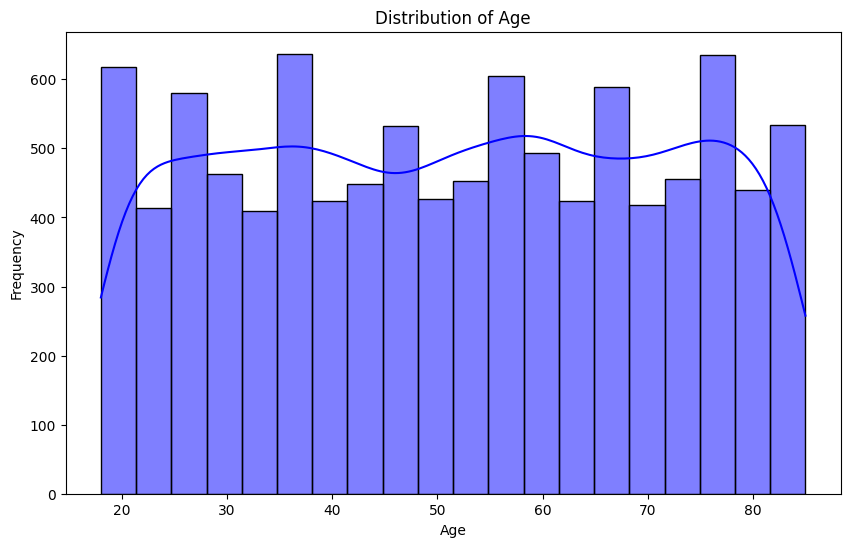

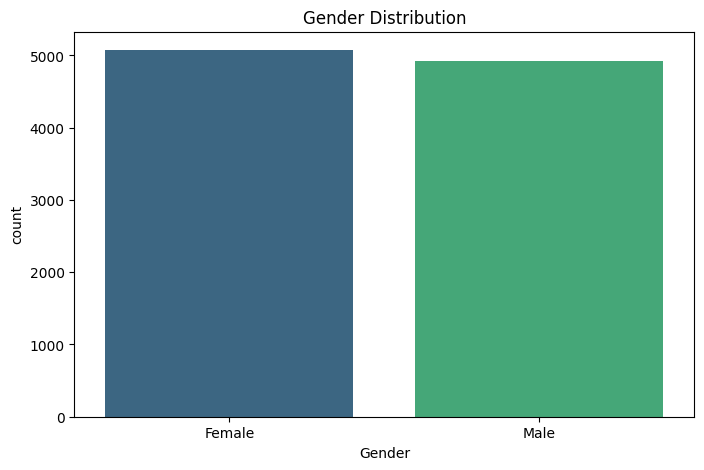

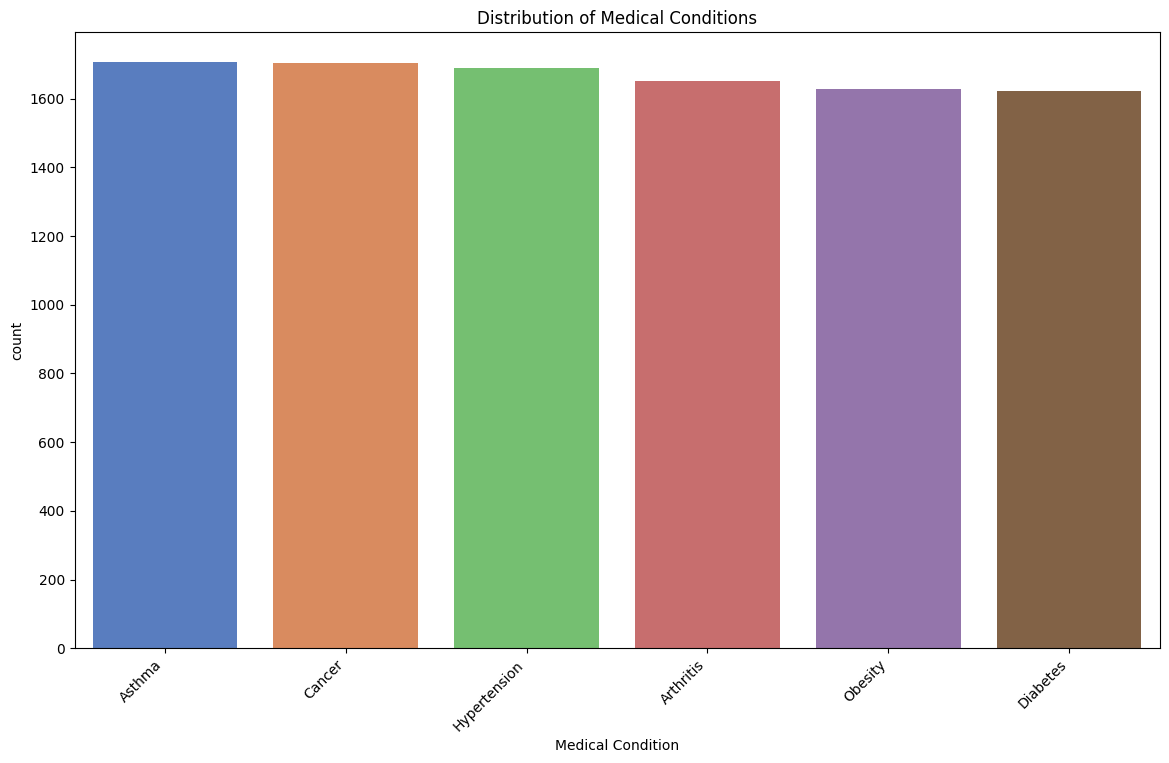

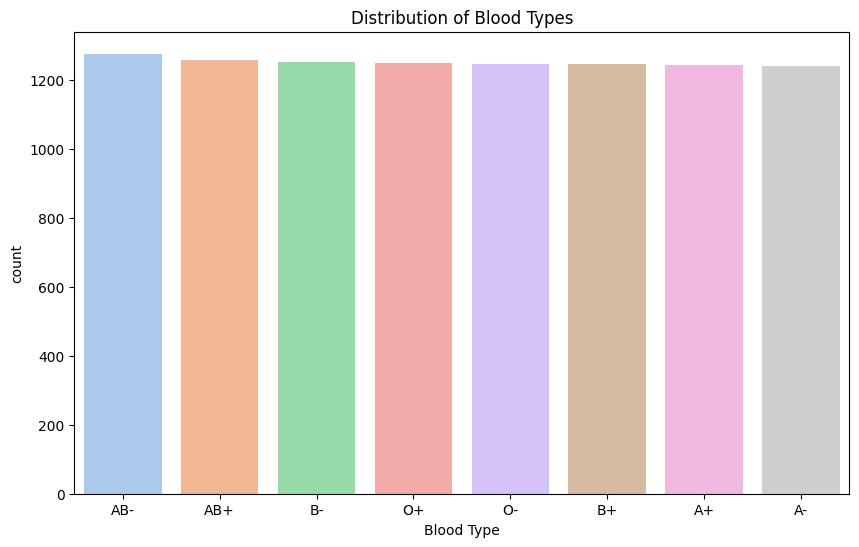

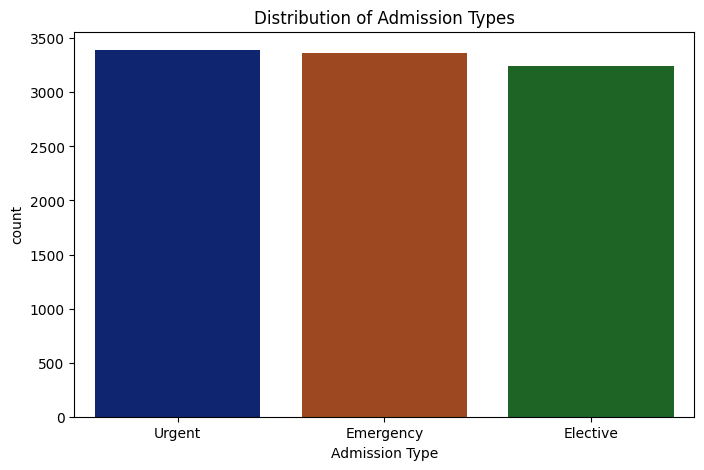

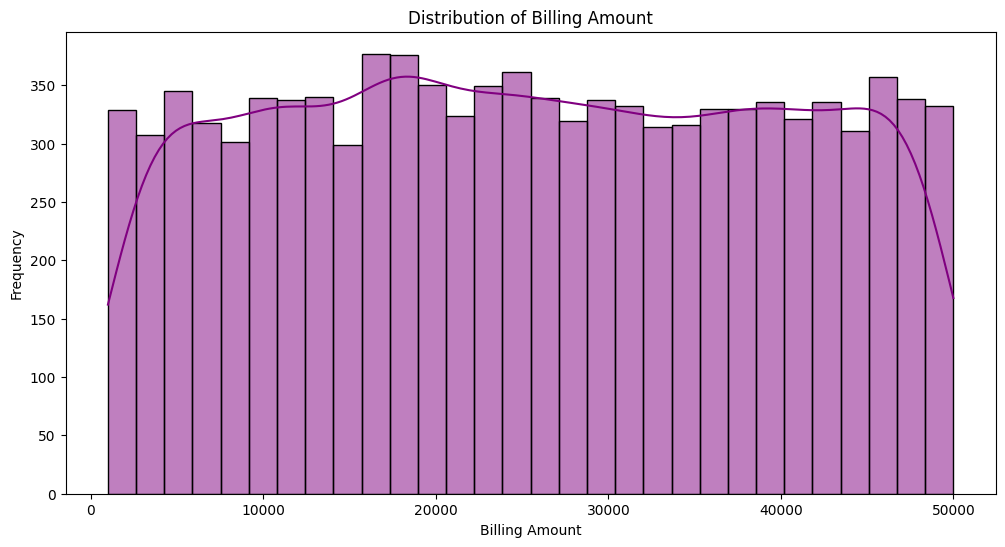

In [ ]:
# Visualize Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Gender Distribution')
plt.show()

# Medical Condition distribution
plt.figure(figsize=(14, 8))
sns.countplot(x='Medical Condition', data=df, palette='muted', order=df['Medical Condition'].value_counts().index)
plt.title('Distribution of Medical Conditions')
plt.xticks(rotation=45, ha='right')
plt.show()

# Blood Type distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Blood Type', data=df, palette='pastel', order=df['Blood Type'].value_counts().index)
plt.title('Distribution of Blood Types')
plt.show()

# Admission Type distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Admission Type', data=df, palette='dark', order=df['Admission Type'].value_counts().index)
plt.title('Distribution of Admission Types')
plt.show()

# Billing Amount distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Billing Amount'], bins=30, kde=True, color='purple')
plt.title('Distribution of Billing Amount')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()

**Correlation Heatmap**
- Membuat heatmap untuk melihat korelasi antar variabel numerik dalam dataset.
- Anotasi ditambahkan untuk menampilkan nilai korelasi di setiap sel.

<ipython-input-11-8da845d37199>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


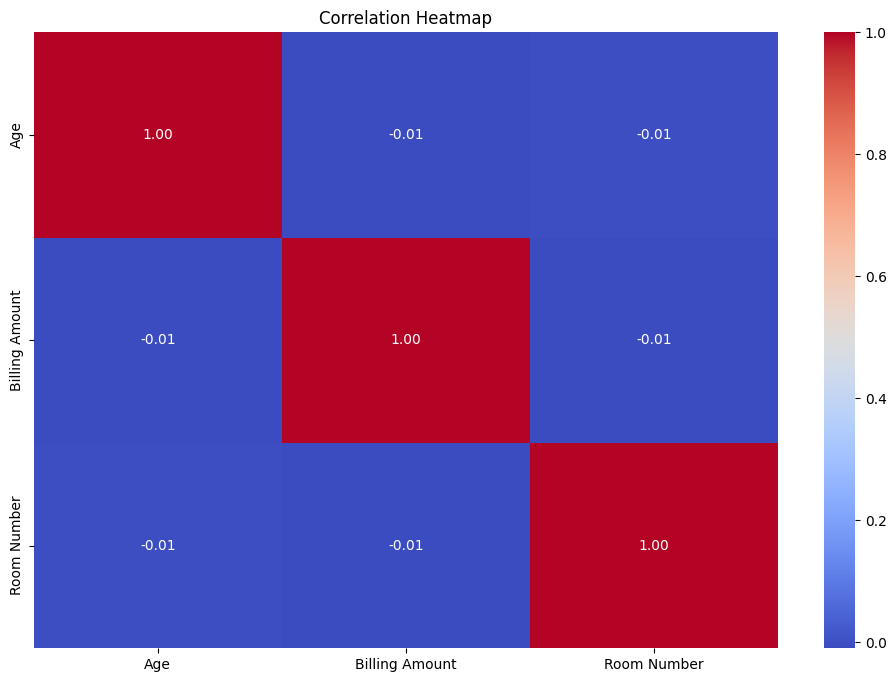

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Training Data

Training model atau training data merujuk pada proses pelatihan sebuah model machine learning menggunakan dataset tertentu. Proses ini melibatkan penggunaan data yang telah diketahui labelnya (ground truth) untuk melatih model sehingga model dapat belajar pola atau hubungan antara fitur-fitur (features) dalam data tersebut dan label yang sesuai.

**Import Library yang Dibutuhkan**

Memuat library yang diperlukan untuk pemrosesan data dan pengembangan model. Pandas digunakan untuk manipulasi data, dan modul dari scikit-learn (train_test_split, RandomForestClassifier, LabelEncoder, accuracy_score, classification_report, confusion_matrix) digunakan untuk melakukan pemrosesan dan evaluasi model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Load Dataset**
- Path dataset kesehatan disimpan dalam variabel healtcare_dataset_path.
- pd.read_csv() digunakan untuk membaca dataset dari file CSV dan menyimpannya dalam DataFrame (df).


In [ ]:
healtcare_dataset_path='/content/drive/MyDrive/Dataset/healthcare_dataset.csv'
df = pd.read_csv(healtcare_dataset_path)

**Preprocessing**
- Menentukan kolom target ('Gender') dan fitur-fitur yang akan digunakan untuk pelatihan model.
- Membuat DataFrame baru (df) yang hanya berisi kolom target dan fitur-fitur yang dipilih.

In [ ]:
target_column = 'Gender'
features = ['Age', 'Blood Type', 'Insurance Provider', 'Billing Amount', 'Admission Type']
df = df[features + [target_column]]

**Handling Missing Values**
- Menghapus baris yang mengandung nilai null dari DataFrame.

In [ ]:
df.dropna(inplace=True)

**Encoding Categorical Columns**
- Menggunakan LabelEncoder untuk mengubah nilai-nilai kategori menjadi angka.
- Kolom-kolom kategorikal seperti 'Blood Type', 'Insurance Provider', 'Admission Type', dan 'Gender' diubah menjadi nilai numerik.

In [ ]:
le = LabelEncoder()
df['Blood Type'] = le.fit_transform(df['Blood Type'])
df['Insurance Provider'] = le.fit_transform(df['Insurance Provider'])
df['Admission Type'] = le.fit_transform(df['Admission Type'])
df[target_column] = le.fit_transform(df[target_column])

**Separating Dataset**
- Memisahkan dataset menjadi fitur (X) dan target (y).

In [ ]:
X = df.drop(target_column, axis=1)
y = df[target_column]

**Splitting Dataset into Training and Testing Sets**
- Membagi dataset menjadi set pelatihan dan pengujian dengan menggunakan train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Initializing and Training the Random Forest Model**
- Menginisialisasi model Random Forest dan melatihnya menggunakan data pelatihan.

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Making Predictions**
- Menggunakan model yang telah dilatih untuk membuat prediksi pada data pengujian.

In [ ]:
y_pred = model.predict(X_test)

**Evaluating the Model**
- Menggunakan beberapa metrik evaluasi seperti akurasi, matriks kebingungan (confusion matrix), dan laporan klasifikasi untuk mengevaluasi kinerja model.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

**Print Evaluation Results**

In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.4925
Confusion Matrix:
 [[517 466]
 [549 468]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.53      0.50       983
           1       0.50      0.46      0.48      1017

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



- Akurasi adalah rasio prediksi yang benar terhadap total jumlah prediksi. Dalam kasus ini, akurasi adalah sekitar 49.25%, yang berarti sekitar setengah dari prediksi model benar.


### Evaluating Data

Evaluasi model atau evaluasi data adalah proses mengukur kinerja dan keefektifan suatu model machine learning atau algoritma berdasarkan performanya pada dataset yang telah diuji. Tujuan dari evaluasi model adalah untuk memahami sejauh mana model mampu memgeneralisasi pada data baru yang tidak pernah dilihat selama proses pelatihan.

**Load Libraries**

Memuat library yang diperlukan untuk pemrosesan data, pengembangan model Random Forest, dan evaluasi model. Modul GridSearchCV digunakan untuk mencari parameter terbaik.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

**Load Dataset**

Menentukan path file dataset dan membaca dataset dari file CSV menggunakan Pandas.

In [ ]:
healtcare_dataset_path='/content/drive/MyDrive/Dataset/healthcare_dataset.csv'
df = pd.read_csv(healtcare_dataset_path)

**Preprocessing**
- Menentukan kolom target ('Gender') dan fitur-fitur yang akan digunakan untuk pelatihan model.
- Membuat DataFrame baru (df) yang hanya berisi kolom target dan fitur-fitur yang dipilih.

In [ ]:
target_column = 'Gender'
features = ['Age', 'Blood Type', 'Insurance Provider', 'Billing Amount', 'Admission Type']
df = df[features + [target_column]]

**Handling Missing Values**

Menghapus baris yang mengandung nilai null dari DataFrame.

In [ ]:
df.dropna(inplace=True)

**Encoding Categorical Columns**
- Menggunakan LabelEncoder untuk mengubah nilai-nilai kategori menjadi angka.
- Kolom-kolom kategorikal seperti 'Blood Type', 'Insurance Provider', 'Admission Type', dan 'Gender' diubah menjadi nilai numerik.

In [ ]:
le = LabelEncoder()
df['Blood Type'] = le.fit_transform(df['Blood Type'])
df['Insurance Provider'] = le.fit_transform(df['Insurance Provider'])
df['Admission Type'] = le.fit_transform(df['Admission Type'])
df[target_column] = le.fit_transform(df[target_column])

**Separating Dataset**

Memisahkan dataset menjadi fitur (X) dan target (y).**bold text**

In [ ]:
X = df.drop(target_column, axis=1)
y = df[target_column]

**Splitting Dataset into Training and Testing Sets**

Membagi dataset menjadi set pelatihan dan pengujian menggunakan train_test_split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Apply SMOTE for Oversampling**

Menggunakan metode SMOTE untuk oversampling agar menangani ketidakseimbangan kelas.

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**Initializing Random Forest Model**

Menginisialisasi model Random Forest yang akan dioptimalkan

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

**Define Parameter Grid for GridSearchCV**

Menentukan kumpulan parameter yang akan diuji menggunakan Grid Search.

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

**Initialize GridSearchCV**

Menginisialisasi GridSearchCV dengan model Random Forest, parameter grid, 5-fold cross-validation, dan pengukuran kinerja menggunakan akurasi.

In [ ]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

**Fit the Grid Search to the Data**

- Melatih GridSearchCV pada dataset oversampled menggunakan SMOTE.
- Mendapatkan parameter terbaik dari hasil pencarian grid.
- Menggunakan parameter terbaik untuk melatih model Random Forest.

In [ ]:
grid_search.fit(X_train_smote, y_train_smote)

best_params = grid_search.best_params_

best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=20, min_samples_split=10, random_state=42)

**Make Predictions**

Menggunakan model yang telah dilatih untuk membuat prediksi pada data pengujian.

In [ ]:
y_pred = best_rf_model.predict(X_test)

**Evaluate and print the Model**

Menggunakan beberapa metrik evaluasi seperti akurasi, matriks kebingungan (confusion matrix), dan laporan klasifikasi untuk mengevaluasi kinerja model.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.495
Confusion Matrix:
 [[479 504]
 [506 511]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.49      0.49       983
           1       0.50      0.50      0.50      1017

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.50      0.49      0.50      2000

